# Radiopadre Tutorial
                                                                O. Smirnov <o.smirnov@ru.ac.za>, January 2018

Radiopadre is a framework, built on the Jupyter notebook, for browsing and visualizing data reduction products. It is particularly useful for visualizing data products on remote servers, where connection latencies and/or lack of software etc. limits the usual visualization options. It includes integration with the JS9 browser-based FITS viewer (with CARTA integration coming soon).

The general use case for Radiopadre is "here I am sitting with a slow ssh connection into a remote cluster node, my pipeline has produced 500 plots/logs/FITS images, how do I make sense of this mess?" More specifically, there are three (somewhat overlapping) scenarios that Radiopadre is designed for:

* Just browsing: interactively exploring the aforementioned 500 files using a notebook.

* Automated reporting: customized Radiopadre notebooks that automatically generate a report composed of a pipeline's outputs and intermediate products. Since your pipeline's output is (hopefully!) structured, i.e. in terms of filename conventions etc., you can write a notebook to exploit that structure and make a corresponding report automatically.

* Sharing notebooks: fiddle with a notebook until everything is visualized just right, insert explanatory text in mardkdown cells in between, voila, you have an instant report you can share with colleagues.

## Installing Radiopadre
### pip or KERN installation
Coming soon
### Docker installation
Coming soon
### Installing from source
Use this if you want to track the git repository (i.e. latest and greatest version, or perhaps a development branch).

* prerequisites: ``git``, ``pip``, ``virtualenv``. For JS9 support, also ``libcfitsio-dev`` and ``nodejs`` (NB: I think this is the complete list, but please notify me if there are other dependencies that prevent you from installing.)

* ``git clone https://github.com/ratt-ru/radiopadre-devel radiopadre`` or ``git clone https://github.com/ratt-ru/radiopadre`` (depending on which repo you track)

* put the resulting ``radiopadre/bin`` into your path

* run ``install-radiopadre``

This should create a radiopadre virtual environment (under ``~/.radiopadre/venv``) and prepare it for running radiopadre.

**Tracking updates**: If you use ``git pull`` to pull in changes, you may sometimes need to run ``install-radiopadre reinstall`` to reinitialize the virtual environment. For minor updates this is not usually needed, so you can skip it if you're feeling lazy (since the process takes a few minutes). When in doubt, reinstall. When unexpected errors arise, reinstall.

## Running Radiopadre -- local session

Change into a directory that you'd like to browse, and run 

```
$ run-radiopadre .
```

This will start up the environment, run Jupyter, and open a browser window for you. A starter nodebook called ``radiopadre-default.ipynb`` will be created for you, if it doesn't already exist.

## Running Radiopadre -- remote session

In principle, all you need is ssh access to the remote node, so that you can ssh into it with a single command. If you need to hop through a login node first (as is the case on many clusters), you'll need to set up a proxy in your ``.ssh/config`` that will allow you such a single-command login:

```
Host realnode
        ProxyCommand ssh login-node.some.where.com netcat -q 600 realnode 22
```

Now, locally, you can run

```
$ run-remote-padre realnode:path
```

This should ssh into realnode, open up all necessary SSH tunnels, and open a browser window for you connected to Jupyter on the remote node.

**Remote installation**: if Radiopadre is not available on the remote node, the ``run-remote-padre`` script will do its best to install it automatically. It will start by cloning Radiopadre under ``~/radiopadre`` on the remote. If you want finer control over this process (e.g. tracking a particular branch, etc.), clone and install Radiopadre yourself on the remote node. Check ``run-remote-padre --help`` for other options. There are switches for forcing a git pull on the remote, forcing a re-install on the remote, etc.

## Running this tutorial

Download .... and untar somewhere. Then run Radiopadre (locally or remotely, if you unpacked the tutorial on a remote node) in the resulting directory. A Jupyter console will pop up in your browser. Click on ``radiopadre-tutorial.ipynb`` to open it in a separate window, then click the "Run all" button on the toolbar (or use "Cell|Run all" in the menu, which is the same thing.) Wait for the notebook to run through and render, then carry on reading.


## Every Radiopadre notebook starts with this

In [1]:
from radiopadre import ls, settings
dd = ls()         # calls radiopadre.ls() to get a directory listing, assigns this to dd
dd                # standard notebook feature: the result of the last expression on the cell is rendered in HTML

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/home/oms/projects/radiopadre-tutorial: 11 files, 2 dirs
:
0: images
1: demo-D147.ms
2: j0839-5417_2-MFS-dirty.fits
3: j0839-5417_2-MFS-image.fits
4: radiopadre-tutorial.ipynb
5: 1525170187-1_meqtrees-gjones_plots-chan.png
6: 1525170187-1_meqtrees-gjones_plots-timeslot.png
7: 1525177515-1_meqtrees-gjones_plots-chan.png
8: 1525177515-1_meqtrees-gjones_plots-timeslot.png
9: 1525184885-1_meqtrees-gjones_plots-chan.png
10: 1525184885-1_meqtrees-gjones_plots-timeslot.png
11: log-autoflag_0.txt
12: log-calibrate_1_0.txt

In [2]:
dd.show()
print "Calling .show() on an object renders it in HTML anyway, same as if it was the last statement in the cell"

Calling .show() on an object renders it in HTML anyway, same as if it was the last statement in the cell


## Most objects knows how to show() themselves
So what can you see from the above? ``dd`` is a directory object than can render itself -- you get a directory listing. Clearly, Radiopadre can recognize certain types of files -- you can see an ``images/`` subdirectory above, a measurement set, a couple of FITS files, some PNG images, etc. Clicking on a file will either download it or display it in a new tab (this works well for PNG or text files -- don't click on FITS files unless you mean to download a whole copy!) FITS files have a "JS9" button next to them that invokes the JS9 viewer either below the cell, or in a new browser tab. Try it!

Now let's get some objects from the directory listing and get them to render.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

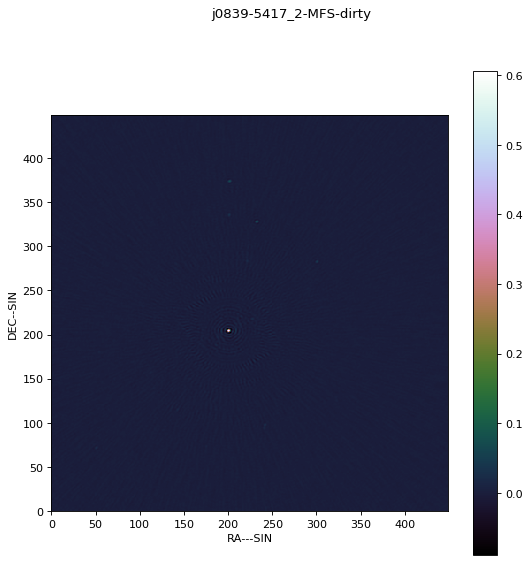

In [3]:
images_subdir = dd[0]
demo_ms = dd[1]
fits_image = dd[2]
log_file = dd[-1]   # last file in directory... consistent with Python list syntax
images_subdir.show()
demo_ms.show(_=(32,0))  # _ selects channels/correlations... more detail later
fits_image.show()
log_file.show()
# be prepared for a lot of output below... scroll through it

## Most things are list-like
What you see above is that different object types know how to show themselves intelligently. You also see that a directory object acts like a Python list -- ``dd[n]`` gets the n-th object from the directory. What about a slice?

In [4]:
images_subdir[5:10]

images[5:10]: 5 files
:
0: images/meerkathi-1525170187-1gc1-G0-gain-ph.png
1: images/meerkathi-1525170187-1gc1-K0-delay.png
2: images/meerkathi-1525170187-1gc1-PREB0-bandpass-amp.png
3: images/meerkathi-1525170187-1gc1-PREB0-bandpass-phase.png
4: images/meerkathi-1525170187_1284.full_pol-noise_weights.png

Since a directory is a list of files, it makes sence that the Python slice syntax ``[5:10]`` returns an object that is also a list of files. There are other list-like objects in radiopadre. For example, an MS can be considered a list of rows. So...



In [5]:
sub_ms = demo_ms[5:10]   # gives us a table containing rows 5 through 9 of the MS
sub_ms.show(_=(32,0))    # _ selects channels/correlations... more detail later

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

And a text file is really just a list of lines, so:

In [6]:
log_file[-10:]   # extract last ten lines and show them

5407: MeqTrees Done!
5408: Preparing to make gain plots
5409: Successful readonly open of default-locked table /home/pserra/msdir/1525340732-j0844-5444.ms/FEED: 12 columns, 16 rows
5410: Extracting feed type from MS
5411: Feed type is [YX]
5412: Making Gain plots (G)...
5413: loading gain solutions from /home/pserra/output/1525340732-j0844-5444-cal1.gain.cp
5414: loaded solutions for 16 antennas, diagonal=True
5415: generated plot 1525340732-1_meqtrees-gjones_plots-timeslot.png
5416: generated plot 1525340732-1_meqtrees-gjones_plots-chan.png

NB: FITS images and PNG images are not lists in any sense, so this syntax doesn't work on them. (In the future I'll consider supporting numpy-like slicing, e.g. ``[100:200,100:200]``, to transparently extract subsections of images, but for now this is not implemented.)

## And list-like things can be searched with ()
Radiopadre's list-like objects (directories/file lists, text files, CASA tables) also support a "search" function, invoked by calling them like a function. This returns an object that is subset of the original object. Three examples:

In [7]:
png_files = dd("*.png")   # on directories, () works like a shell pattern
png_files

*.png: 6 files
:
0: 1525170187-1_meqtrees-gjones_plots-chan.png
1: 1525170187-1_meqtrees-gjones_plots-timeslot.png
2: 1525177515-1_meqtrees-gjones_plots-chan.png
3: 1525177515-1_meqtrees-gjones_plots-timeslot.png
4: 1525184885-1_meqtrees-gjones_plots-chan.png
5: 1525184885-1_meqtrees-gjones_plots-timeslot.png

In [8]:
log_file("Gain plots")   # on text files, () works like grep

618: Making Gain plots (G)...
1232: Making Gain plots (G)...
1846: Making Gain plots (G)...
2512: Making Gain plots (G)...
3125: Making Gain plots (G)...
4275: Making Gain plots (G)...
5412: Making Gain plots (G)...

In [9]:
demo_ms("ANTENNA1==1").show(_=(32,0))    # on tables, () does a TaQL query

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Other useful things to do with directories/lists of files
If you have a list of image or FITS files, you can ask for thumbnails by calling ``.thumbs()``. 

In [10]:
png_files.thumbs()    # for PNG images, these are nice and clickable!

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

And calling ``.images`` on a directory returns a list of images. For which we can, of course, render thumbnails:

In [11]:
images_subdir.images.thumbs()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Other such "list of files by type" attributes are ``.fits``, ``.tables``, and ``.dirs``:

In [12]:
dd.fits.show()
dd.tables.show()
dd.dirs.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

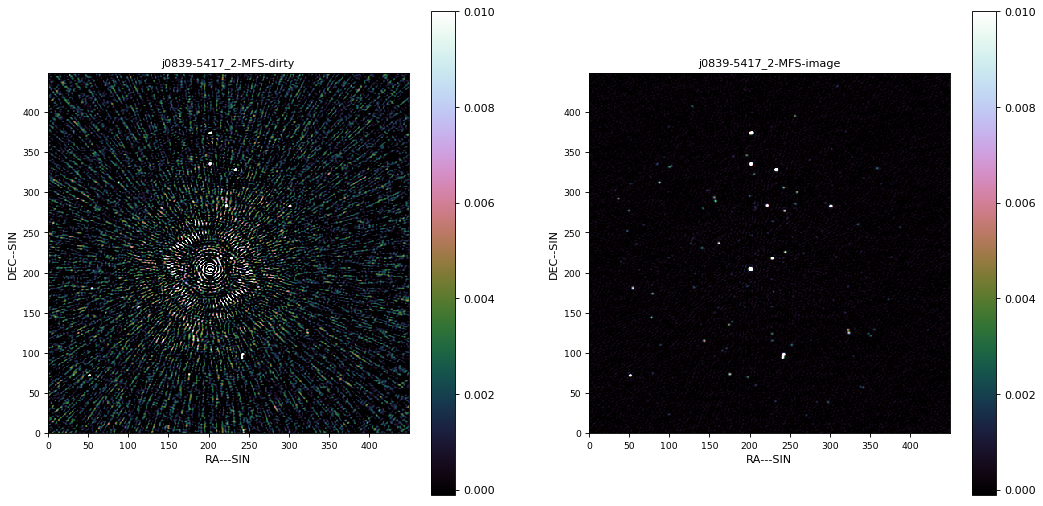

In [13]:
dd.fits.thumbs(vmin=-1e-4, vmax=0.01)   # and FITS files also know how to make themselves a thumbnail
# note that thumbs() takes optional arguments just like show()

And the ``show_all()`` method will call ``show()`` on every file object in the list. This is useful if you want to render a bunch of objects with the same parameters:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

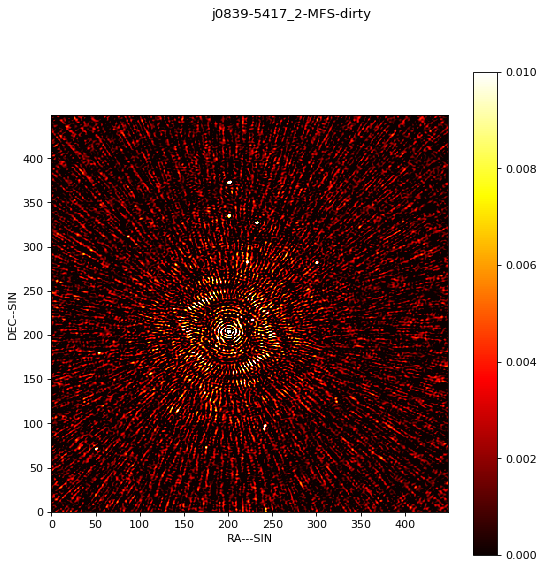

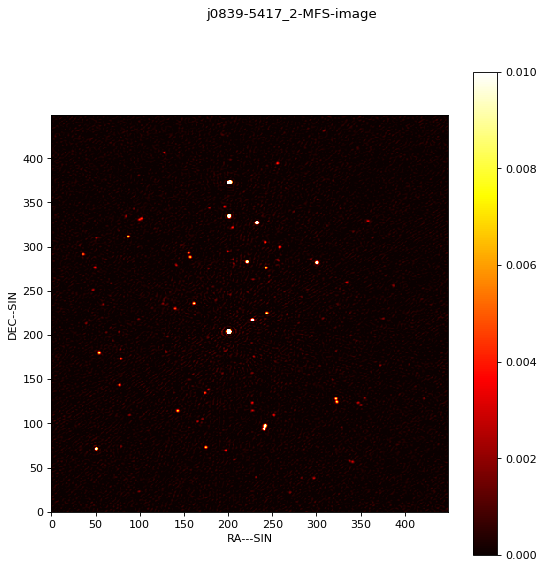

In [14]:
# note the difference: dd.fits selects all files of type FITS, dd("*fits") selects all files matching "*fits".
# In our case this happens to be one and the same thing, but it doesn't have to be
dd("*fits").show_all(vmin=0, vmax=1e-2, colormap='hot')
# show_all() passes all its arguments to the show() method of each file.

## Accessing a single file by name
The ``(pattern)`` operation applied to a directory always returns a filelist (possibly an empty one), even if the pattern is not relly a pattern and selects only one file:

In [51]:
dirties = dd("j0839-5417_2-MFS-dirty.fits")
print "This is a list:", type(dirties), len(dirties)   # this is a list even though we only specified one file
print "This is a single file:", type(dirties[0]) # so we have to use [0] to get at the FITS file itself
# Note that the summary attribute returns a short summary of any radiopadre object (as text or HTML). 
# You can show() or print it
print "This is a summary of the list:",dirties.summary
print "And now in HTML:"
dirties.summary.show()
print "This is a summary of the file:",dirties[0].summary
print "And now in HTML:"
dirties[0].summary.show()    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

This is a list: <class 'radiopadre.filelist.FileList'> 1
This is a single file: <class 'radiopadre.fitsfile.FITSFile'>
This is a summary of the list: j0839-5417_2-MFS-dirty.fits: 1 file
And now in HTML:


This is a summary of the file: j0839-5417_2-MFS-dirty.fits: 450x450x1x1 16.00" RA,DEC,FREQ,STOKES 12:15:12 Jan 13
And now in HTML:


If you want to get at one specific file, using ``dd(name_or_pattern)[0]`` becomes a hassle. Filelists therefore support a direct ``[name_or_pattern]`` operation which always returns a single file object. If ``name_or_pattern`` matches multiple files, only the first one is returned (but radiopadre will show you a transient warning message).

In [16]:
dirty_image = dd["*fits"]   # matches 2 files. if you re-execute this with Ctrl+Enter, you'll see a warning
print type(dirty_image)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<class 'radiopadre.fitsfile.FITSFile'>


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

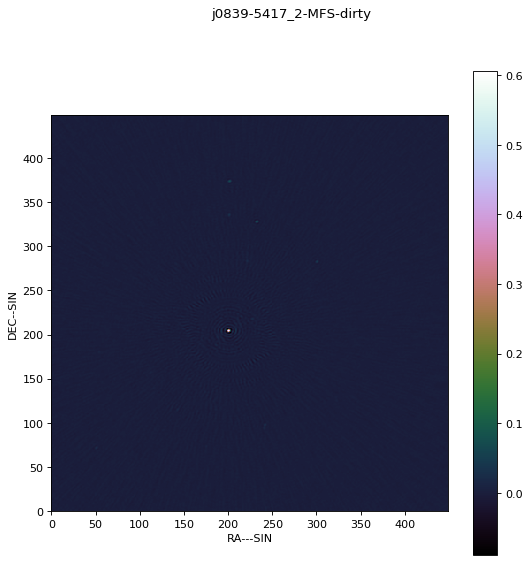

In [17]:
dirty_image = dd["*dirty*fits"]  # this will match just the one file
dirty_image.show()

## Working with text files
By default, radiopadre renders the beginning and end of a text file. But you can also explicitly render just the head, or just the tail, or the full file.

In [18]:
log_file

log-calibrate_1_0.txt: 5416 lines, modified 10:50:01 Jan 12
1: 
2: -----------------------------------
3: Stimela version     : 1.0.0
4: Cab name            : pserra_cab/calibrator
5: -------------------------------------
6: running: /usr/bin/meqtree-pipeliner.py --mt 8 -c /code/tdlconf.profiles [stefcal] ms_sel.ms_read_flags=1 ms_sel.input_column=DATA ms_sel.field_index=0 ms_sel.msname=/home/pserra/msdir/1525170187-j0831-5517.ms stefcal_gain.table=/home/pserra/output/1525170187-j0831-5517-cal1.gain.cp tiggerlsm.lsm_subset=all ms_wfl.write_bitflag=stefcal stefcal_gain.freqint=700 stefcal_gain.enabled=1 stefcal_gain.flag_chisq=0 do_output=CORR_DATA stefcal_gain.flag_ampl=1 ms_sel.ddid_index=0 ms_sel.tile_size=128 ms_sel.ms_write_flag_policy="'replace set'" ms_rfl.read_flagsets=-stefcal stefcal_gain.reset=1 stefcal_gain.implementation=GainDiagPhase stefcal_gain.flag_chisq_threshold=10 ms_rfl.read_legacy_flags=1 stefcal_gain.flag_ampl_low=0.5 ms_sel.ms_corr_sel='2x2' stefcal_gain.flag_ampl_high=1.5 stefcal_gain.mode=solve-save tiggerlsm.filename=/home/pserra/output/j0831-5517_1-pybdsm.lsm.html stefcal_gain.timeint=8 ms_sel.output_column=CORRECTED_DATA /usr/local/lib/python2.7/dist-packages/Cattery/Calico/calico-stefcal.py =stefcal
7: /usr/local/lib/python2.7/dist-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
8: PyFITSDeprecationWarning)  # noqa
9: ### Starting meqserver
10: ### Attaching to configuration file /code/tdlconf.profiles
...
5407: MeqTrees Done!
5408: Preparing to make gain plots
5409: Successful readonly open of default-locked table /home/pserra/msdir/1525340732-j0844-5444.ms/FEED: 12 columns, 16 rows
5410: Extracting feed type from MS
5411: Feed type is [YX]
5412: Making Gain plots (G)...
5413: loading gain solutions from /home/pserra/output/1525340732-j0844-5444-cal1.gain.cp
5414: loaded solutions for 16 antennas, diagonal=True
5415: generated plot 1525340732-1_meqtrees-gjones_plots-timeslot.png
5416: generated plot 1525340732-1_meqtrees-gjones_plots-chan.png

In [19]:
log_file.head(5)   # same as log_file.show(head=5). Number is optional -- default is 10

In [20]:
log_file.tail(5)  # same as log_file.show(tail=5)

In [21]:
log_file.full()   # same as log_file.show(full=True). Use the scrollbar next to the cell output.

In [22]:
log_file("Gain")     # same as log_file.grep("Gain") or log_file.show(grep="Gain")

6: running: /usr/bin/meqtree-pipeliner.py --mt 8 -c /code/tdlconf.profiles [stefcal] ms_sel.ms_read_flags=1 ms_sel.input_column=DATA ms_sel.field_index=0 ms_sel.msname=/home/pserra/msdir/1525170187-j0831-5517.ms stefcal_gain.table=/home/pserra/output/1525170187-j0831-5517-cal1.gain.cp tiggerlsm.lsm_subset=all ms_wfl.write_bitflag=stefcal stefcal_gain.freqint=700 stefcal_gain.enabled=1 stefcal_gain.flag_chisq=0 do_output=CORR_DATA stefcal_gain.flag_ampl=1 ms_sel.ddid_index=0 ms_sel.tile_size=128 ms_sel.ms_write_flag_policy="'replace set'" ms_rfl.read_flagsets=-stefcal stefcal_gain.reset=1 stefcal_gain.implementation=GainDiagPhase stefcal_gain.flag_chisq_threshold=10 ms_rfl.read_legacy_flags=1 stefcal_gain.flag_ampl_low=0.5 ms_sel.ms_corr_sel='2x2' stefcal_gain.flag_ampl_high=1.5 stefcal_gain.mode=solve-save tiggerlsm.filename=/home/pserra/output/j0831-5517_1-pybdsm.lsm.html stefcal_gain.timeint=8 ms_sel.output_column=CORRECTED_DATA /usr/local/lib/python2.7/dist-packages/Cattery/Calico/calico-stefcal.py =stefcal
29: ### Setting option stefcal_gain.implementation=GainDiagPhase
58: 18.43 5.6Gb gainopts(GainOpts.py:218:load_initval): not loading G solutions: /home/pserra/output/1525170187-j0831-5517-cal1.gain.cp does not exist
60: 18.43 5.6Gb gainopts(GainOpts.py:287:resolve_tilings): datashape (111, 2100) expanded datashape is (112, 2100)
61: 18.43 5.6Gb gainopts(GainOpts.py:294:resolve_tilings): gain tiling is [8, 700] smoothing is ()
62: 18.43 5.6Gb gainopts(GainOpts.py:295:resolve_tilings): based on an LCM tiling of [8, 700]
75: 20.23 7.1Gb gainopts(GainOpts.py:305:init_solver): stefcal G solve=1 GainDiagPhase, using 120 solvable inteferometers
76: 20.23 7.1Gb gainopts(GainOpts.py:306:init_solver):   solution intervals: [8, 700] smoothing kernel: ()
77: 20.23 7.1Gb gainopts(GainOpts.py:308:init_solver):   gains will be flagged on amplitudes outside of (0.5, 1.5)
78: 20.23 7.1Gb gainopts(GainOpts.py:313:init_solver):   default initial value is 1
...
4872: 48.68 9.0Gb gainopts(GainOpts.py:294:resolve_tilings): gain tiling is [8, 700] smoothing is ()
4873: 48.68 9.0Gb gainopts(GainOpts.py:295:resolve_tilings): based on an LCM tiling of [8, 700]
4885: 49.45 9.0Gb gainopts(GainOpts.py:305:init_solver): stefcal G solve=1 GainDiagPhase, using 120 solvable inteferometers
4886: 49.45 9.0Gb gainopts(GainOpts.py:306:init_solver):   solution intervals: [8, 700] smoothing kernel: ()
4887: 49.45 9.0Gb gainopts(GainOpts.py:308:init_solver):   gains will be flagged on amplitudes outside of (0.5, 1.5)
4888: 49.45 9.0Gb gainopts(GainOpts.py:313:init_solver):   default initial value is 1
4889: 49.45 9.0Gb gaindiag(GainDiagPhase.py:92:__init__): convergence target 21 of 21 real slots
4890: 49.45 9.0Gb gainopts(GainOpts.py:320:init_solver):   subshape (7, 3) tiled [7, 8, 3, 700]
4912: 61.87 9.0Gb gainopts(GainOpts.py:261:flush_tables): saved 1 gain set(s) to /home/pserra/output/1525340732-j0844-5444-cal1.gain.cp
5412: Making Gain plots (G)...

In [23]:
# and of course all objects are just "lists of lines", so the normal list slicing syntax works
log_file("Gain")[10:20].show()
log_file("Gain")[-1]

(5411, 'Making Gain plots (G)...\n')

## "Watching" text files
If you're still running a reduction and want to keep an eye on a log file that's being updated, use the ``.watch()`` method. This works exactly like ``.show()`` and takes the same arguments, but adds a "refresh" button at the top right corner of the cell, which re-executes the cell every time you click it.

In [24]:
log_file.watch(head=0, tail=10)

## Working with FITS files
As you saw above, FITS files can be rendered with ``show()``, or viewed via the JS9 buttons. There's also an explicit ``.js9()`` method which invokes the viewer in a cell:

In [25]:
dirty_image.summary.show()
dirty_image.js9()

With multiple FITS files, it's possible to load all of them into JS9, and use the "<" and ">" keys to switch between images. Use the "JS9 all" button to do this:

In [26]:
dd("*fits")

*fits: 2 files
:
0: j0839-5417_2-MFS-dirty.fits
1: j0839-5417_2-MFS-image.fits

There's a shortcut for doing this directly -- just call ``.js9()`` on a list of FITS files (note that "collective" functions such as ``.thumbs()`` and ``.js9()`` will only work on *homogenuous* filelists, i.e. lists of FITS files. Don't try calling them on a list contaning a mix of files -- it won't work!)

In [52]:
# If you're wondering how to tell JS9 to start with specific scale settings, use the "with settings" trick 
# shown here. It will be explained below...
with settings.fits(vmin=-1e-4, vmax=0.01):  
    dd("*fits").js9()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The ``.header`` attribute of a FITS file object returns the FITS header, in the same kind of object (list-of-lines) as a text file. So all the tricks we did on text files above still apply:

In [28]:
dirty_image.header

j0839-5417_2-MFS-dirty.fits FITS header: 71 lines
1: SIMPLE  =                    T / file does conform to FITS standard
2: BITPIX  =                  -32 / number of bits per data pixel
3: NAXIS   =                    4 / number of data axes
4: NAXIS1  =                  450 / length of data axis 1
5: NAXIS2  =                  450 / length of data axis 2
6: NAXIS3  =                    1 / length of data axis 3
7: NAXIS4  =                    1 / length of data axis 4
8: EXTEND  =                    T / FITS dataset may contain extensions
9: COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
10: COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H
...
62: WSCVWSUM=     392611669.932128
63: HISTORY wsclean -name /home/pserra/output/j0839-5417_2 -mem 100 -weight briggs -
64: HISTORY 1.5 -super-weight 1.0 -weighting-rank-filter-size 16 -taper-gaussian 0.0
65: HISTORY  -size 450 450 -scale 16asec -channels-out 3 -grid-mode kb -kernel-size
66: HISTORY 7 -oversampling 63 -pol I -intervals-out 1 -data-column CORRECTED_DATA -
67: HISTORY niter 100000000 -auto-threshold 0.5 -auto-mask 7 -gain 0.1 -mgain 0.9 -j
68: HISTORY oin-channels -multiscale-scale-bias 0.6 -fit-spectral-pol 2 -fit-beam -e
69: HISTORY lliptical-beam /home/pserra/msdir/1525340732-j0839-5417.ms /home/pserra/
70: HISTORY msdir/1525351833-j0839-5417.ms /home/pserra/msdir/1525364832-j0839-5417.
71: HISTORY ms /home/pserra/msdir/1525375796-j0839-5417.ms

In [29]:
dirty_image.header("CDELT*")

26: CDELT1  = -0.00444444444444444
31: CDELT2  =  0.00444444444444444
36: CDELT3  =        109716796.875
41: CDELT4  =                   1.

In [30]:
dirty_image.header.full()

If you want to read in data from the FITS file, the ``.fitsobj`` attribute returns a ``PrimaryHDU`` object, just like ``astropy.io.fits.open(filename)`` would:

In [31]:
dirty_image.fitsobj

## Working with CASA tables
As you saw above, a CASA table object knows how to render itself as a table. Default is to render rows 0 to 100. With array columns, the default display becomes a little unwieldy:

In [32]:
demo_ms

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

demo-D147.ms: 34500 rows, 24 columns, 14 keywords, 13 subtables

With optional arguments to ``.show()``, you can render just a subset of rows (given as start_row, nrows), and a subset of columns, taking a slice through an array column. The below tells radiopadre to render the first 10 rows, taking the column TIME in its entirety, and taking a ``[32:34,:]`` slice through the DATA column.

In [33]:
demo_ms.show(0,10,TIME=(),DATA=(slice(32,34),None))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

If you want to render *all* columns with a common slice, use the optional ``_`` argument (we saw this above). The given slice will be applied to all columns as much as possible (or at least to those that match the shape):

In [34]:
demo_ms.show(0, 10, _=(32,0))  # selects channel 32, correlation 0 from all 2D array columns. Doesn't apply to
# other types of columns

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The ``.table`` attribute returns a casacore table object with which you can do all the normal casacore table operations:

In [35]:
print type(demo_ms.table)

<class 'casacore.tables.table.table'>


But if you want to quickly read data from a table, radiopadre provides some fancier methods. For example, subtables of the table are available as a ``.SUBTABLE_NAME`` attribute. This gives another table object, with all the functions above available:

In [36]:
demo_ms.ANTENNA

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

demo-D147.ms/ANTENNA: 28 rows, 8 columns, 0 keywords, 0 subtables

...while columns of the table can be read via a ``.COLUMN_NAME()`` function (with optional start_row, nrows, step arguments):

In [37]:
demo_ms.UVW()

array([[ -27.56147677,  -60.68931434,  -26.00890554],
       [  75.07797061,  165.30904481,   70.69110802],
       [ -35.56470895,  425.90716619,  -13.9759864 ],
       ...,
       [ -88.21255939,   41.39858248,  -68.89387705],
       [-119.40524995, -113.64748519, -104.0740896 ],
       [ -31.19269862, -155.0460669 ,  -35.1802044 ]])

So combining the above, here's how to compute the UVW in wavelengths of all baselines to antenna 1, and make a uv-coverage plot of that subset of baselines:

[[1.2665e+09 1.2705e+09 1.2745e+09 1.2785e+09 1.2825e+09 1.2865e+09
  1.2905e+09 1.2945e+09 1.2985e+09 1.3025e+09 1.3065e+09 1.3105e+09
  1.3145e+09 1.3185e+09 1.3225e+09 1.3265e+09 1.3305e+09 1.3345e+09
  1.3385e+09 1.3425e+09 1.3465e+09 1.3505e+09 1.3545e+09 1.3585e+09
  1.3625e+09 1.3665e+09 1.3705e+09 1.3745e+09 1.3785e+09 1.3825e+09
  1.3865e+09 1.3905e+09 1.3945e+09 1.3985e+09 1.4025e+09 1.4065e+09
  1.4105e+09 1.4145e+09 1.4185e+09 1.4225e+09 1.4265e+09 1.4305e+09
  1.4345e+09 1.4385e+09 1.4425e+09 1.4465e+09 1.4505e+09 1.4545e+09
  1.4585e+09 1.4625e+09 1.4665e+09 1.4705e+09 1.4745e+09 1.4785e+09
  1.4825e+09 1.4865e+09 1.4905e+09 1.4945e+09 1.4985e+09 1.5025e+09
  1.5065e+09 1.5105e+09 1.5145e+09 1.5185e+09]]
(64, 2645, 3)


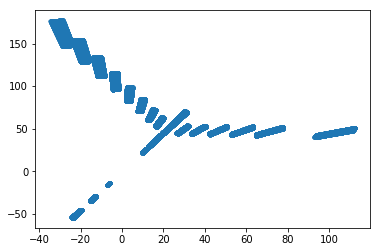

In [38]:
import numpy as np
freqs = demo_ms.SPECTRAL_WINDOW.CHAN_FREQ(0, 1)  # read frequencies for spw 0
print freqs
subset = demo_ms("ANTENNA1 == 1")
uvw_lambda = subset.UVW()[np.newaxis,:,:]*3e+8/freqs[0,:,np.newaxis,np.newaxis]
print uvw_lambda.shape
import pylab
pylab.plot(uvw_lambda[:,:,0].flatten(), uvw_lambda[:,:,1].flatten(), '.')

## The ls() function
...is where it all begins. As you saw, ``ls()`` gives you the current directory. You can also use ``ls`` with filename patterns, and also specify a sort order:

In [39]:
ls("*txt -rt")   # give *txt files in reverse order of modification time

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/home/oms/projects/radiopadre-tutorial/*txt: 2 files
:
0: log-calibrate_1_0.txt
1: log-autoflag_0.txt

In [40]:
logs = ls("*txt -rt")   # of course this just returns a list-of-files object
logs

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/home/oms/projects/radiopadre-tutorial/*txt: 2 files
:
0: log-calibrate_1_0.txt
1: log-autoflag_0.txt

You can also use the "R" switch for a recursive directory listing:

In [41]:
ls("*png -R")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/home/oms/projects/radiopadre-tutorial/*png: 97 files
:
0: 1525177515-1_meqtrees-gjones_plots-timeslot.png
1: 1525170187-1_meqtrees-gjones_plots-timeslot.png
2: 1525184885-1_meqtrees-gjones_plots-chan.png
3: 1525177515-1_meqtrees-gjones_plots-chan.png
4: 1525184885-1_meqtrees-gjones_plots-timeslot.png
5: 1525170187-1_meqtrees-gjones_plots-chan.png
6: images/meerkathi-1525192271-1gc1-B0-bandpass-amp.png
7: images/meerkathi-1525340732-1gc1-F0-gain-amp.png
8: images/meerkathi-1525192271-1gc1-B0-bandpass-phase.png
9: images/meerkathi-1525375796-1gc1-B0-bandpass-amp.png
10: images/meerkathi-1525184885-1gc1-G0-gain-amp.png
11: images/meerkathi-1525340732-1gc1-K0-delay.png
12: images/meerkathi-1525184885-1gc1-F0-gain-amp.png
13: images/meerkathi-1525170187-1gc1-G0-gain-amp.png
14: images/meerkathi-1525177515-1gc1-F0-gain-amp.png
15: images/meerkathi-1525351833-1gc1-F0-gain-ph.png
16: images/meerkathi-1525199667-1gc1-B0-bandpass-phase.png
17: images/meerkathi-1525207061-1gc1-PREB0-bandpass-amp.png
18: images/meerkathi-1525351833-1gc1-F0-gain-amp.png
19: images/meerkathi-1525207061-1gc1-PREB0-bandpass-phase.png
20: images/meerkathi-1525184885-1gc1-B0-bandpass-phase.png
21: images/meerkathi-1525340732-1gc1-PREB0-bandpass-phase.png
22: images/meerkathi-1525364832-1gc1-B0-bandpass-phase.png
23: images/meerkathi-1525351833-1gc1-PREB0-bandpass-phase.png
24: images/meerkathi-1525364832-1gc1-PREB0-bandpass-phase.png
25: images/meerkathi-1525364832-1gc1-PREB0-bandpass-amp.png
26: images/meerkathi-1525199667-1gc1-G0-gain-ph.png
27: images/meerkathi-1525170187-1gc1-PREB0-bandpass-phase.png
28: images/meerkathi-1525375796-1gc1-K0-delay.png
29: images/meerkathi-1525207061-1gc1-K0-delay.png
30: images/meerkathi-1525199667-1gc1-B0-bandpass-amp.png
31: images/meerkathi-1525351833-1gc1-G0-gain-ph.png
32: images/meerkathi-1525170187-1gc1-PREB0-bandpass-amp.png
33: images/meerkathi-1525192271-1gc1-PREB0-bandpass-amp.png
34: images/meerkathi-1525184885-1gc1-PREB0-bandpass-phase.png
35: images/meerkathi-1525170187-1gc1-B0-bandpass-phase.png
36: images/meerkathi-1525364832-1gc1-G0-gain-amp.png
37: images/meerkathi-1525184885-1gc1-G0-gain-ph.png
38: images/meerkathi-1525207061-1gc1-G0-gain-ph.png
39: images/meerkathi-1525375796-1gc1-G0-gain-amp.png
40: images/meerkathi-1525375796-1gc1-PREB0-bandpass-amp.png
41: images/meerkathi-1525177515-1gc1-G0-gain-ph.png
42: images/meerkathi-1525184885-1gc1-B0-bandpass-amp.png
43: images/meerkathi-1525170187-1gc1-F0-gain-ph.png
44: images/meerkathi-1525207061-1gc1-F0-gain-amp.png
45: images/meerkathi-1525199667-1gc1-F0-gain-amp.png
46: images/meerkathi-1525192271-1gc1-G0-gain-amp.png
47: images/meerkathi-1525199667-1gc1-PREB0-bandpass-amp.png
48: images/meerkathi-1525199667-1gc1-F0-gain-ph.png
49: images/meerkathi-1525207061-1gc1-B0-bandpass-amp.png
50: images/meerkathi-1525375796-1gc1-B0-bandpass-phase.png
51: images/meerkathi-1525192271-1gc1-F0-gain-amp.png
52: images/meerkathi-1525375796-1gc1-F0-gain-ph.png
53: images/meerkathi-1525207061-1gc1-B0-bandpass-phase.png
54: images/meerkathi-1525170187-1gc1-B0-bandpass-amp.png
55: images/meerkathi-1525351833-1gc1-G0-gain-amp.png
56: images/meerkathi-1525351833-1gc1-K0-delay.png
57: images/meerkathi-1525375796-1gc1-PREB0-bandpass-phase.png
58: images/meerkathi-1525177515-1gc1-PREB0-bandpass-amp.png
59: images/meerkathi-1525340732-1gc1-PREB0-bandpass-amp.png
60: images/meerkathi-1525170187-1gc1-F0-gain-amp.png
61: images/meerkathi-1525199667-1gc1-G0-gain-amp.png
62: images/meerkathi-1525340732-1gc1-G0-gain-ph.png
63: images/meerkathi-1525199667-1gc1-K0-delay.png
64: images/meerkathi-1525375796-1gc1-F0-gain-amp.png
65: images/meerkathi-1525351833-1gc1-PREB0-bandpass-amp.png
66: images/meerkathi-1525184885-1gc1-K0-delay.png
67: images/meerkathi-1525364832-1gc1-G0-gain-ph.png
68: images/meerkathi-1525192271-1gc1-PREB0-bandpass-phase.png
69: images/meerkathi-1525207061-1gc1-F0-gain-ph.png
70: images/meerkathi-1525340732-1gc1-F0-gain-ph.png
71: images/meerkathi-1525177515-1gc1-G0

Or give a filename to get an object representing that one file:

In [42]:
image = ls("1525170187-1_meqtrees-gjones_plots-chan.png")
image

1525170187-1_meqtrees-gjones_plots-chan.png: PNG 1500x3600

Om the same principle, give a subdirectory name to get a directory object:

In [43]:
images_dir = ls("images")
images_dir

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

images: 91 files
:
0: images/meerkathi-1525170187-1gc1-B0-bandpass-amp.png
1: images/meerkathi-1525170187-1gc1-B0-bandpass-phase.png
2: images/meerkathi-1525170187-1gc1-F0-gain-amp.png
3: images/meerkathi-1525170187-1gc1-F0-gain-ph.png
4: images/meerkathi-1525170187-1gc1-G0-gain-amp.png
5: images/meerkathi-1525170187-1gc1-G0-gain-ph.png
6: images/meerkathi-1525170187-1gc1-K0-delay.png
7: images/meerkathi-1525170187-1gc1-PREB0-bandpass-amp.png
8: images/meerkathi-1525170187-1gc1-PREB0-bandpass-phase.png
9: images/meerkathi-1525170187_1284.full_pol-noise_weights.png
10: images/meerkathi-1525177515-1gc1-B0-bandpass-amp.png
11: images/meerkathi-1525177515-1gc1-B0-bandpass-phase.png
12: images/meerkathi-1525177515-1gc1-F0-gain-amp.png
13: images/meerkathi-1525177515-1gc1-F0-gain-ph.png
14: images/meerkathi-1525177515-1gc1-G0-gain-amp.png
15: images/meerkathi-1525177515-1gc1-G0-gain-ph.png
16: images/meerkathi-1525177515-1gc1-K0-delay.png
17: images/meerkathi-1525177515-1gc1-PREB0-bandpass-amp.png
18: images/meerkathi-1525177515-1gc1-PREB0-bandpass-phase.png
19: images/meerkathi-1525184885-1gc1-B0-bandpass-amp.png
20: images/meerkathi-1525184885-1gc1-B0-bandpass-phase.png
21: images/meerkathi-1525184885-1gc1-F0-gain-amp.png
22: images/meerkathi-1525184885-1gc1-F0-gain-ph.png
23: images/meerkathi-1525184885-1gc1-G0-gain-amp.png
24: images/meerkathi-1525184885-1gc1-G0-gain-ph.png
25: images/meerkathi-1525184885-1gc1-K0-delay.png
26: images/meerkathi-1525184885-1gc1-PREB0-bandpass-amp.png
27: images/meerkathi-1525184885-1gc1-PREB0-bandpass-phase.png
28: images/meerkathi-1525192271-1gc1-B0-bandpass-amp.png
29: images/meerkathi-1525192271-1gc1-B0-bandpass-phase.png
30: images/meerkathi-1525192271-1gc1-F0-gain-amp.png
31: images/meerkathi-1525192271-1gc1-F0-gain-ph.png
32: images/meerkathi-1525192271-1gc1-G0-gain-amp.png
33: images/meerkathi-1525192271-1gc1-G0-gain-ph.png
34: images/meerkathi-1525192271-1gc1-K0-delay.png
35: images/meerkathi-1525192271-1gc1-PREB0-bandpass-amp.png
36: images/meerkathi-1525192271-1gc1-PREB0-bandpass-phase.png
37: images/meerkathi-1525199667-1gc1-B0-bandpass-amp.png
38: images/meerkathi-1525199667-1gc1-B0-bandpass-phase.png
39: images/meerkathi-1525199667-1gc1-F0-gain-amp.png
40: images/meerkathi-1525199667-1gc1-F0-gain-ph.png
41: images/meerkathi-1525199667-1gc1-G0-gain-amp.png
42: images/meerkathi-1525199667-1gc1-G0-gain-ph.png
43: images/meerkathi-1525199667-1gc1-K0-delay.png
44: images/meerkathi-1525199667-1gc1-PREB0-bandpass-amp.png
45: images/meerkathi-1525199667-1gc1-PREB0-bandpass-phase.png
46: images/meerkathi-1525207061-1gc1-B0-bandpass-amp.png
47: images/meerkathi-1525207061-1gc1-B0-bandpass-phase.png
48: images/meerkathi-1525207061-1gc1-F0-gain-amp.png
49: images/meerkathi-1525207061-1gc1-F0-gain-ph.png
50: images/meerkathi-1525207061-1gc1-G0-gain-amp.png
51: images/meerkathi-1525207061-1gc1-G0-gain-ph.png
52: images/meerkathi-1525207061-1gc1-K0-delay.png
53: images/meerkathi-1525207061-1gc1-PREB0-bandpass-amp.png
54: images/meerkathi-1525207061-1gc1-PREB0-bandpass-phase.png
55: images/meerkathi-1525340732-1gc1-B0-bandpass-amp.png
56: images/meerkathi-1525340732-1gc1-B0-bandpass-phase.png
57: images/meerkathi-1525340732-1gc1-F0-gain-amp.png
58: images/meerkathi-1525340732-1gc1-F0-gain-ph.png
59: images/meerkathi-1525340732-1gc1-G0-gain-amp.png
60: images/meerkathi-1525340732-1gc1-G0-gain-ph.png
61: images/meerkathi-1525340732-1gc1-K0-delay.png
62: images/meerkathi-1525340732-1gc1-PREB0-bandpass-amp.png
63: images/meerkathi-1525340732-1gc1-PREB0-bandpass-phase.png
64: images/meerkathi-1525351833-1gc1-B0-bandpass-amp.png
65: images/meerkathi-1525351833-1gc1-B0-bandpass-phase.png
66: images/meerkathi-1525351833-1gc1-F0-gain-amp.png
67: images/meerkathi-1525351833-1gc1-F0-gain-ph.png
68: images/meerkathi-1525351833-1gc1-G0-gain-amp.png
69: images/meerkathi-1525351833-1gc1-G0-gain-ph.png
70: images/meerkathi-1525351833-1gc1-K0-delay.png
71: images/meerkathi-1525351833-1gc1-PREB0-bandpass-amp.png
72: i

One thing to note is that ``ls()`` (i.e. with no patterns) doesn't necessarily list **all** files. The files included by default are governed by radiopadre settings. Below we'll see how to change those.

## Using and changing settings
The ``settings`` object we imported above can be used to set various defaults of Radiopadre. Like most other objects, it knows how to render itself:   

In [44]:
settings   # same as settings.show(), if it's the last expression in the cell

settings.gen.twocolumn_list_width = 40
settings.gen.timeformat = '%H:%M:%S %b %d'
settings.files.include = None
settings.files.exclude = None
settings.files.include_dir = None
settings.files.exclude_dir = None
settings.files.include_empty = False
settings.files.show_hidden = False
settings.display.cell_width = 800
settings.display.window_width = 1024
settings.display.window_height = 768
settings.display.reset = <function reset at 0x7f68276a3ed8>
settings.plot.width = None
settings.plot.screen_dpi = 80
settings.thumb.mincol = 2
settings.thumb.maxcol = 4
settings.fits.colormap = 'cubehelix'
settings.fits.scale = 'linear'
settings.fits.vmin = None
settings.fits.vmax = None
settings.fits.max_js9_slice = 2048
settings.fits.js9_preview_size = 1024
settings.text.head = 10
settings.text.tail = 10
settings.text.fs = 0.8

In [45]:
# and the various sections will also render themselves
settings.files

files.include = None
files.exclude = None
files.include_dir = None
files.exclude_dir = None
files.include_empty = False
files.show_hidden = False

In [46]:
# changing settings is as easy as
settings.files.include = "*png"
# the new settings apply from that point onwards, so you probably want to do this at the top of a notebook
ls()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/home/oms/projects/radiopadre-tutorial: 6 files, 2 dirs
:
0: images
1: demo-D147.ms
2: 1525170187-1_meqtrees-gjones_plots-chan.png
3: 1525170187-1_meqtrees-gjones_plots-timeslot.png
4: 1525177515-1_meqtrees-gjones_plots-chan.png
5: 1525177515-1_meqtrees-gjones_plots-timeslot.png
6: 1525184885-1_meqtrees-gjones_plots-chan.png
7: 1525184885-1_meqtrees-gjones_plots-timeslot.png

In [47]:
# from now on, only "*png" files will be listed. Unless you override this by an explicit pattern to ls(),
# e.g. in this case "*" overrides settings.files.include:
ls("*")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/home/oms/projects/radiopadre-tutorial/*: 11 files, 2 dirs
:
0: images
1: demo-D147.ms
2: j0839-5417_2-MFS-dirty.fits
3: j0839-5417_2-MFS-image.fits
4: radiopadre-tutorial.ipynb
5: 1525170187-1_meqtrees-gjones_plots-chan.png
6: 1525170187-1_meqtrees-gjones_plots-timeslot.png
7: 1525177515-1_meqtrees-gjones_plots-chan.png
8: 1525177515-1_meqtrees-gjones_plots-timeslot.png
9: 1525184885-1_meqtrees-gjones_plots-chan.png
10: 1525184885-1_meqtrees-gjones_plots-timeslot.png
11: log-autoflag_0.txt
12: log-calibrate_1_0.txt

### Using "with" to change settings temporarily
Python's ``with`` statement works with radiopadre settings to change settings temporarily. For example, the default FITS rendering settings look like this:


In [48]:
settings.fits

fits.colormap = 'cubehelix'
fits.scale = 'linear'
fits.vmin = None
fits.vmax = None
fits.max_js9_slice = 2048
fits.js9_preview_size = 1024

Here's how we can render FITS images with different settings, *without* changing the global settings. Whatever we set in ``with`` only applies in the body of the ``with`` statement. In this case it is particularly useful, as it will also apply to the JS9 displays by default:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

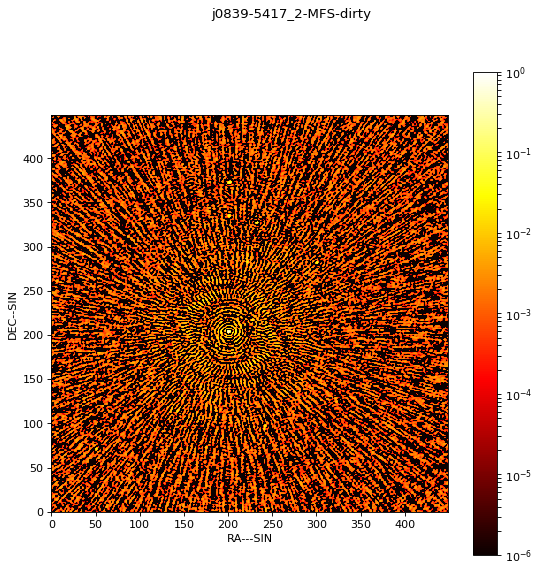

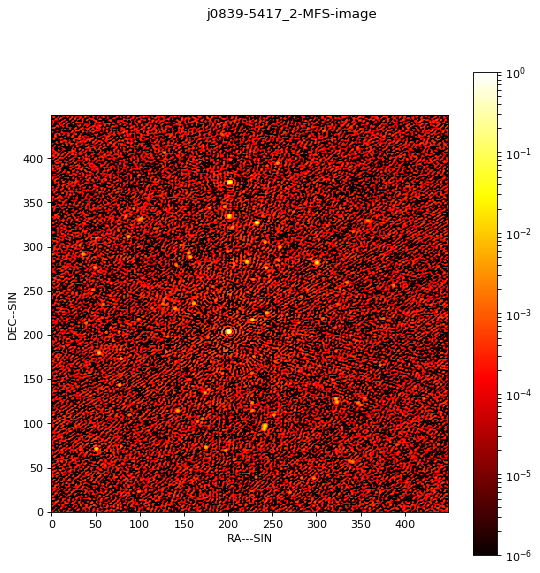

In [54]:
with settings.fits(vmin=1e-6, vmax=1, colormap='hot', scale='log'):
    ls("*fits").show()        # this shows a list of FITS files
    ls("*fits").show_all()    # and this calls show() on every FITS file

In [50]:
# observe that the global settings haven't changed:
settings.fits

fits.colormap = 'cubehelix'
fits.scale = 'linear'
fits.vmin = None
fits.vmax = None
fits.max_js9_slice = 2048
fits.js9_preview_size = 1024